In [1]:
from google.colab import drive

drive.mount('/content/drive')

%cd /content/drive/My Drive/Breast-Cancer_Project

Mounted at /content/drive
/content/drive/My Drive/Breast-Cancer_Project


In [2]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu

# 1. MIL Training : MIL_CNN_Training.py


New Parameters in the model :
1. which predefined model we want to use from pytorch models
2. decide whether or not the model is pretrained on ImageNet
3. Create our own model from scratch using a class (I provided a class customized_CNN1 as example)
4. Use any downloaded pretrained model that is not available on pytorch using its .pth downloaded file
5. Chose any optimizer : Adam, RMSprop, SGD, Rprop,...
6. Chose optimizer learning rate if param is available
7. Chose optimizer weight decay if available
8. Chose proba  threshold for classification



See example below :



```
! python MIL_CNN_Training.py 
--train_lib="MIL_data/train_dict.pth" 
--val_lib="MIL_data/valid_dict.pth" 
--customized_model="customized_CNN1" 
--output="output_model/customized_CNN1/"
--nepochs=11
--optimizer="RMSprop"
--test_every=5
```


We use our own  customized model named --customized_model that we access via the class we have defined. We want the model and corresponding files to be saved in --output . We want to use the --optimizer with default  specified parameters lr and weight decay and train for --nepochs ; test and save the model every --test_every.

Other  parameters include training  and validation data, k representing the number of  tiles of the same class for MIL hypothesis, weights for  loss function, batch size, number of workers.

This function will create a new folder --output with the following files :
1. MIL_CNN_arguments.json to keep track of the arguments we have used . (it will be useful for the gridsearch)
2. MIL_convergence.csv

3. MIL_checkpoint_best.pth : epoch, state_dict, best_acc, optimizer


```
! python MIL_CNN_Training.py --train_lib="MIL_data/train_dict.pth" --val_lib="MIL_data/valid_dict.pth" --model="vgg16" \
 --output="output_model/vgg16/"  --pretrained="True" --nepochs=11 --optimizer="Adam" --test_every=10
```
Another example using a pytorch model vgg16 with pretrained weights from ImageNet (we do not path customized_CNN argument).

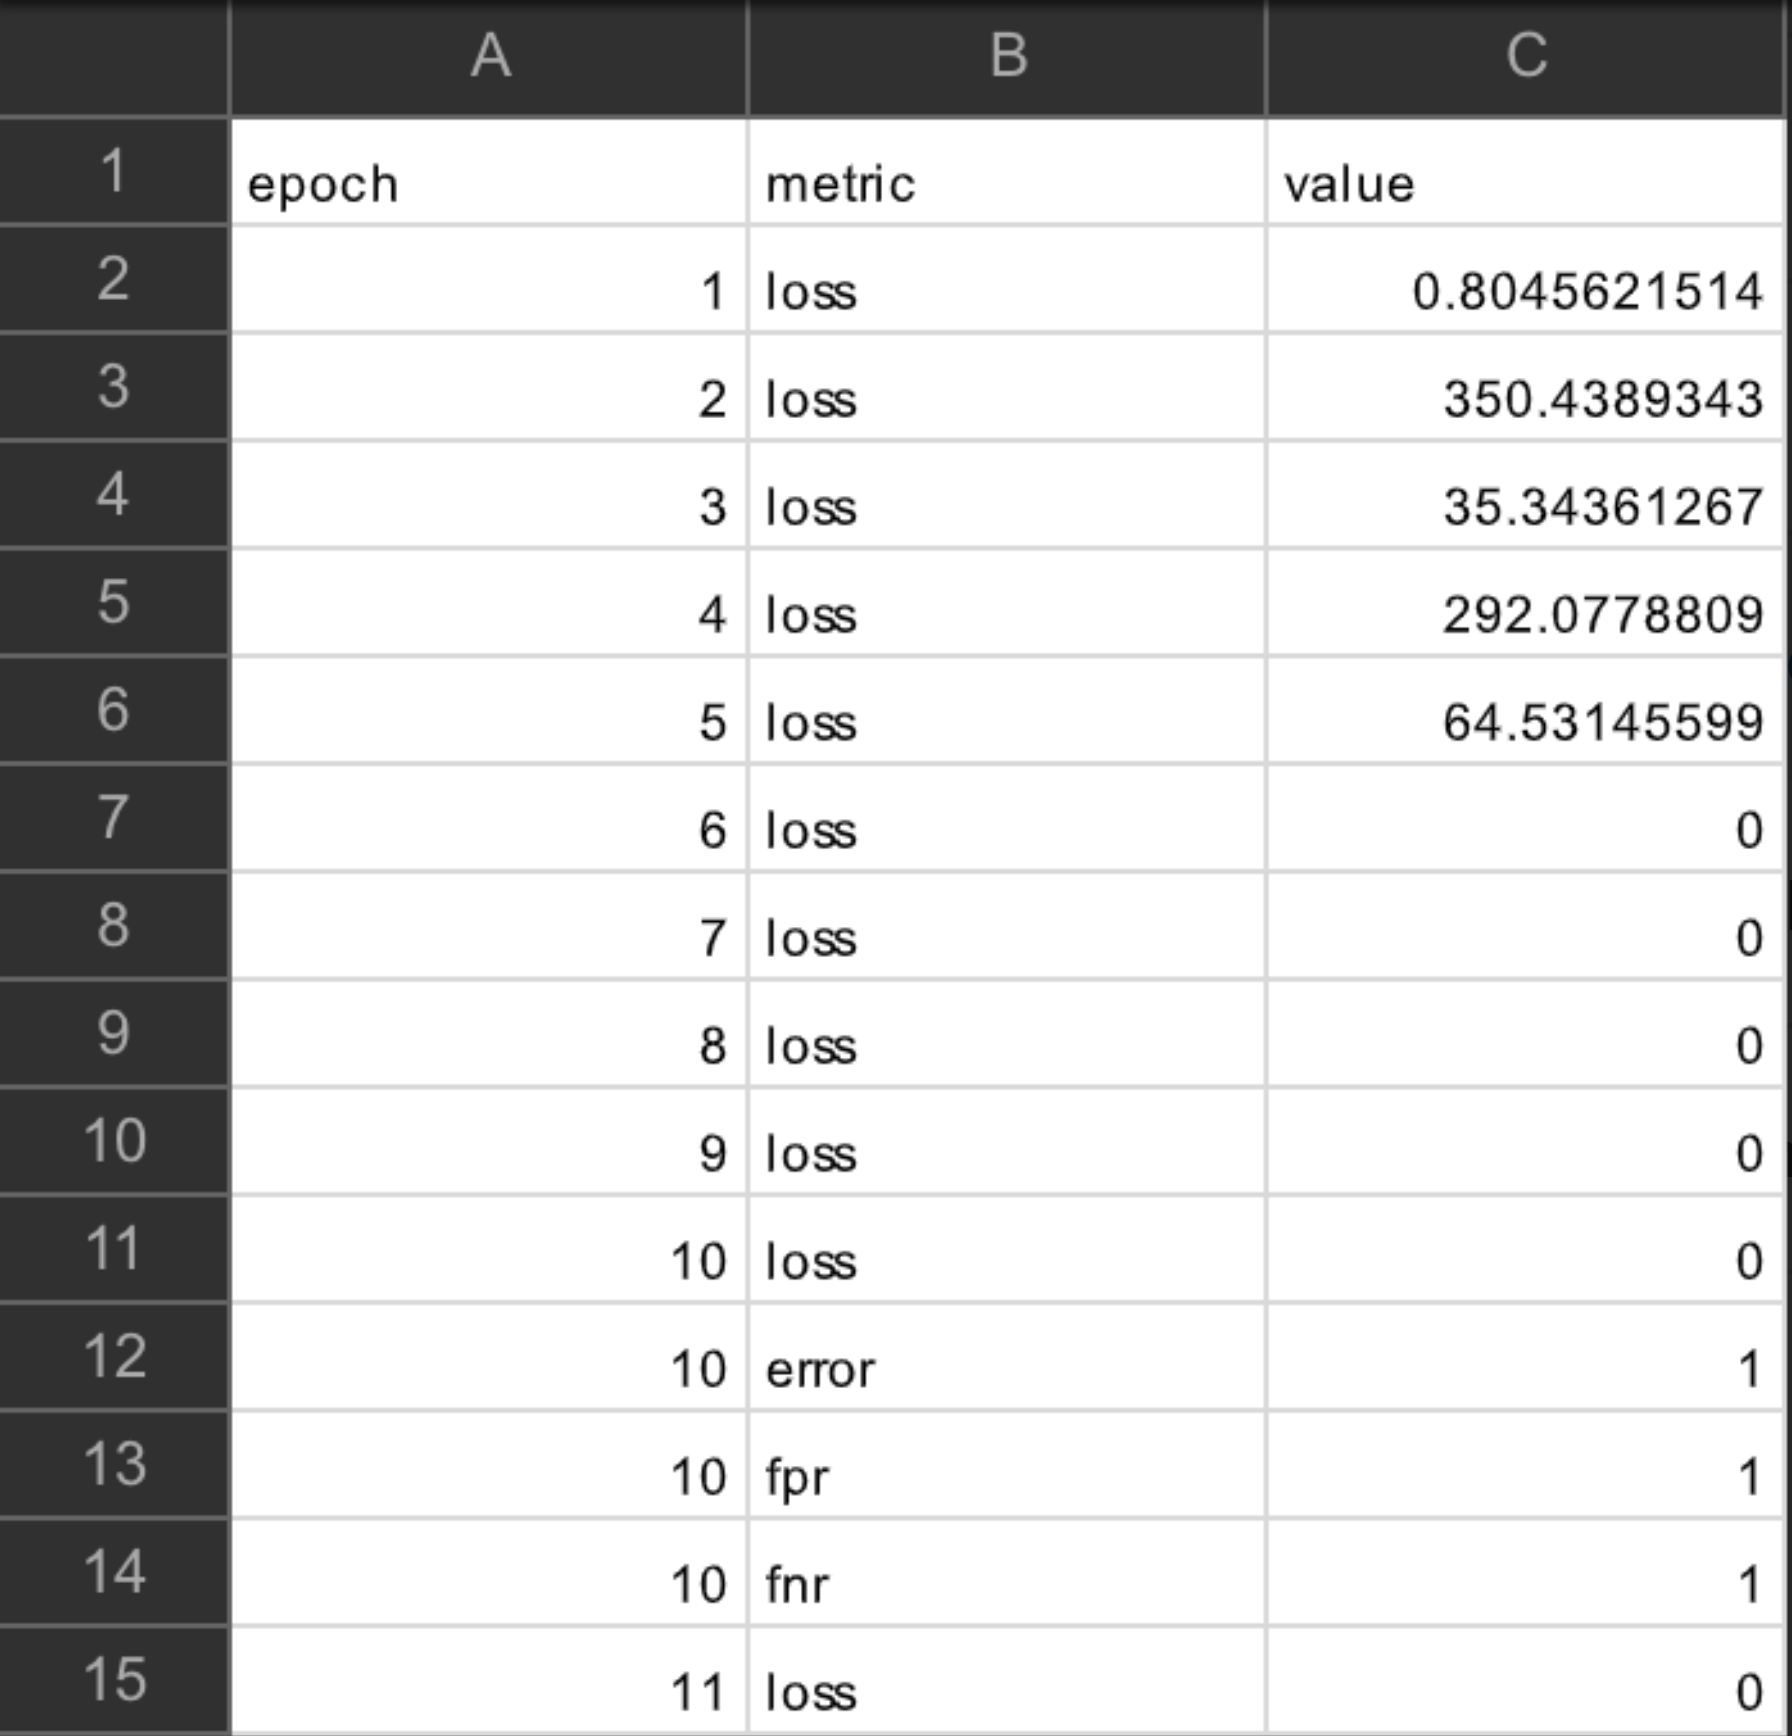

In [8]:
from IPython.core.display import Image, display
Image(filename = "tuto_images/MIL_convergence.png",width=500,height=250)

In [4]:
! python MIL_CNN_Training.py -h

usage: MIL_CNN_Training.py [-h] [--train_lib TRAIN_LIB] [--val_lib VAL_LIB]
                           [--output OUTPUT] [--batch_size BATCH_SIZE]
                           [--nepochs NEPOCHS] [--workers WORKERS]
                           [--test_every TEST_EVERY] [--weights WEIGHTS]
                           [--k K] [--model MODEL] [--pretrained PRETRAINED]
                           [--customized_model CUSTOMIZED_MODEL]
                           [--pretrained_path PRETRAINED_PATH]
                           [--optimizer OPTIMIZER] [--lr LR]
                           [--weight_decay WEIGHT_DECAY]
                           [--proba_threshold PROBA_THRESHOLD]

MIL tile classifier training script

optional arguments:
  -h, --help            show this help message and exit
  --train_lib TRAIN_LIB
                        path to train MIL library binary
  --val_lib VAL_LIB     path to validation MIL library binary. If present.
  --output OUTPUT       name of output file
  --batch_siz

In [5]:
! python MIL_CNN_Training.py --train_lib="MIL_data/train_dict.pth" --val_lib="MIL_data/valid_dict.pth" --customized_model="customized_CNN1" \
 --output="output_model/customized_CNN1/" --nepochs=11 --optimizer="RMSprop" --test_every=10

train_lib MIL_data/train_dict.pth
val_lib MIL_data/valid_dict.pth
output output_model/customized_CNN1/
batch_size 512
nepochs 11
workers 4
test_every 10
weights 0.5
k 1
model resnet34
pretrained True
customized_model customized_CNN1
pretrained_path 
optimizer RMSprop
lr 0.0001
weight_decay 0.0001
proba_threshold 0.5
MIL Model name: customized_CNN1

Number of tiles: 9
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

Number of tiles: 9
Inference	Epoch: [1/11]	Batch: [1/1]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associate

In [6]:
! python MIL_CNN_Training.py --train_lib="MIL_data/train_dict.pth" --val_lib="MIL_data/valid_dict.pth" --model="vgg16" \
 --output="output_model/vgg16/"  --pretrained="True" --nepochs=11 --optimizer="Adam" --test_every=10

train_lib MIL_data/train_dict.pth
val_lib MIL_data/valid_dict.pth
output output_model/vgg16/
batch_size 512
nepochs 11
workers 4
test_every 10
weights 0.5
k 1
model vgg16
pretrained True
customized_model 
pretrained_path 
optimizer Adam
lr 0.0001
weight_decay 0.0001
proba_threshold 0.5
MIL Model name: vgg16

Number of tiles: 9
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

Number of tiles: 9
Inference	Epoch: [1/11]	Batch: [1/1]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and su

# 2. MIL Testing : MIL_CNN_Testing.py


New Parameters in the model :
1. which predefined model we want to use from pytorch models
2. Chose proba threshold for classification
3. Chose proba threshold for classification



See example below :



```
! python  MIL_test_Yanis.py --test_lib="test_dict.pth" --customized_model="" --output="output_model/vgg16/" \
--model_name="vgg16" --model_path="output_model/vgg16/MIL_checkpoint_best.pth" --batch_size=3 --plot_metrics="True"
```


We specify the path of the test data, the path of checkpoint of the MIL model we trained and test on. We can also plot and save the  AUC and the confusion matrix

This function will create 2 files in --output folder :
1. MIL_predictions.csv
2. ROC and confusion matrix plots if plot_metrics = True




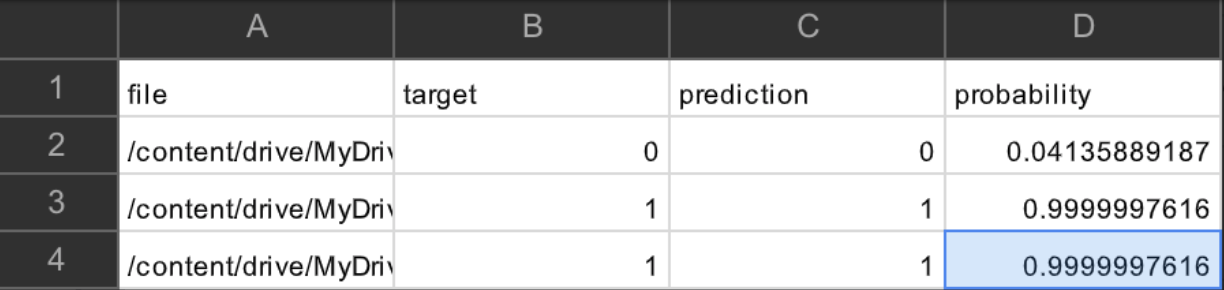

In [7]:
Image(filename = "tuto_images/MIL_prediction.png",width=500,height=80)


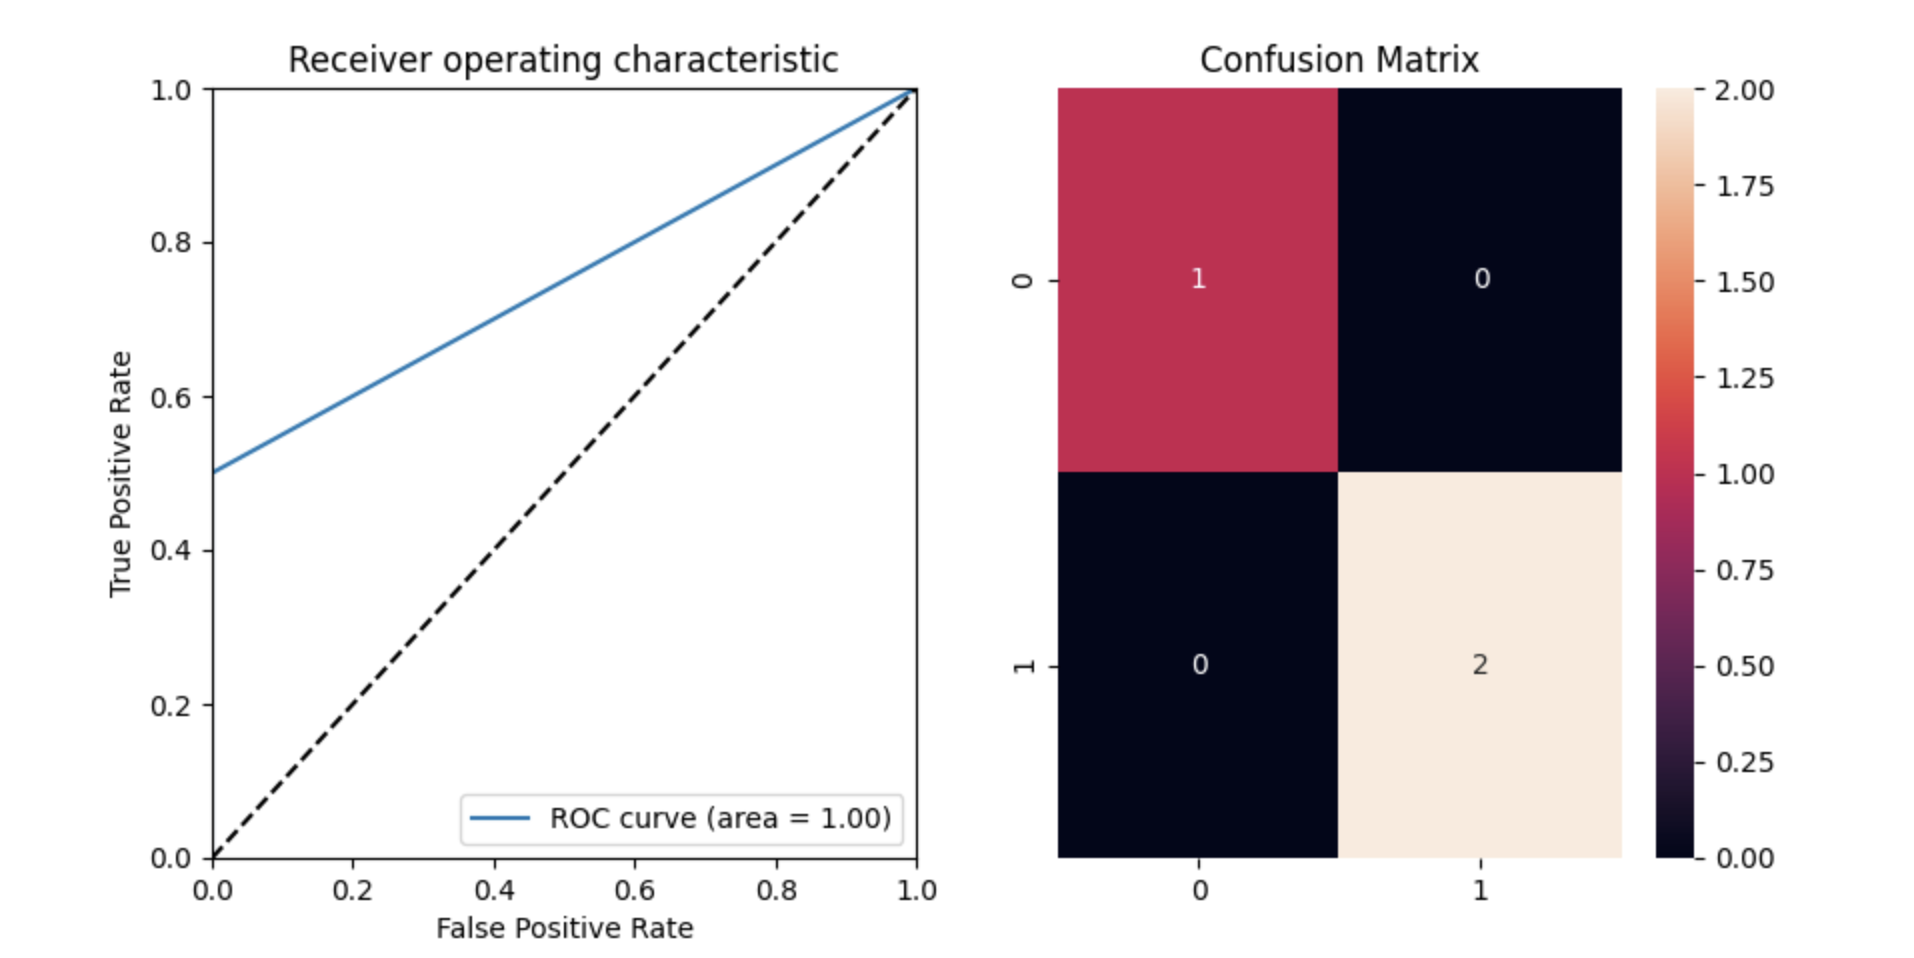

In [8]:
Image(filename = "tuto_images/MIL_plot.png",width=500,height=200)

In [9]:
! python  MIL_CNN_Testing.py --test_lib="MIL_data/test_dict.pth" --customized_model="" --output="output_model/vgg16/" \
--model_name="vgg16" --model_path="output_model/vgg16/MIL_checkpoint_best.pth" --batch_size=3 --plot_metrics="True"

test_lib MIL_data/test_dict.pth
output output_model/vgg16/
model_path output_model/vgg16/MIL_checkpoint_best.pth
batch_size 3
workers 4
model_name vgg16
customized_model 
proba_threshold 0.5
plot_metrics True

Number of tiles: 9
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Batch: [1/3]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/Te

# 3. RNN Training : RNN_Training.py


New Parameters in the model :

1. from which MIL model the embedding will come from
2. which RNN architecture to train the model (GRU, LSTM , classic RNN, ...) (need to create a class for custom architecture but I already provided tunable ones for GRU, LSTM and classic RNN)
3. whether we want the RNN to be bidirectional or not
4. how many hidden layers we want
5. which optimizer to train the RNN on
6. learning rate of the optimizer
7. weight decay of the optimizer

Other important parameters include the top s tiles to use and the length of the hidden representation


See example below :



```
! python RNN_Training.py --train_lib="train_dict.pth"  \
--val_lib="valid_dict.pth" --model="output_model/vgg16/MIL_checkpoint_best.pth" \
--pretrained_model="vgg16" --nepochs=11 --output="output_model/vgg16/" --RNN_model="RNN_LSTM" \
 --num_layers=2 --bidirectional="True" --s=10 --ndims=128
```



We use the embedding learnt from vgg16 MIL and apply a bidirectional LSTM model with 2 hidden layers for the final predictions using the top 10 tiles and a hidden representation of size 128.


This function will create a new folder --output with the following files :
1. RNN_arguments.json to keep track of the arguments we have used . (it will be useful for the gridsearch)
2. RNN_convergence.csv
3. RNN_checkpoint_best.pth : epoch, state_dict, best_acc, optimizer


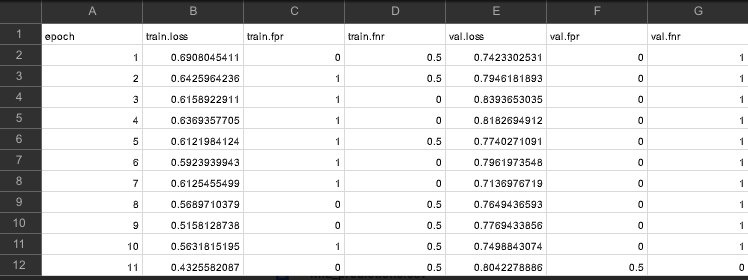

In [5]:
from IPython.core.display import Image, display
Image(filename = "tuto_images/RNN_convergence.png",width=500,height=200)

In [10]:
! python RNN_Training.py --train_lib="MIL_data/train_dict.pth" --val_lib="MIL_data/valid_dict.pth" \
--model="output_model/vgg16/MIL_checkpoint_best.pth" \
--pretrained_model="vgg16" --nepochs=11 --output="output_model/vgg16/" \
--RNN_model="RNN_LSTM" --num_layers=2 --bidirectional="True" --s=10 --ndims=128

train_lib MIL_data/train_dict.pth
val_lib MIL_data/valid_dict.pth
output output_model/vgg16/
batch_size 128
nepochs 11
workers 4
s 10
ndims 128
model output_model/vgg16/MIL_checkpoint_best.pth
weights 0.5
shuffle False
pretrained_model vgg16
RNN_model RNN_LSTM
bidirectional True
num_layers 2
optimizer default
lr 0.1
weight_decay 0.0001
RNN Model: RNN_LSTM
Bidirectional: True

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

Training - Epoch: [1/11]	Batch: [1/1]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs ar

# 4. RNN Testing : RNN_Testing.py


New Parameters in the model :

# New arguments : We can now specify :
        # which pretrained model for the embedding
        # provide RNN architecture we want to use for the RNN model : default , RNN , GRU, LSTM classes are provided in the code below
        # whether or not we want a bidirectional RNN 
        # how many layers in the RNN
        # Chose whether or not to plot the metrics

1. from which MIL model the embedding will come from
2. which RNN architecture to train the model (GRU, LSTM , classic RNN, ...) (need to create a class for custom architecture but I already provided tunable ones for GRU, LSTM and classic RNN)
3. whether or not the RNN used is bidirectional
4. how many hidden layers we used
5. number s of top tiles to use
6. length of hidden representation


See example below :



```
! python  RNN_Testing.py --test_lib="MIL_data/test_dict.pth" --output="output_model/vgg16/" \
--model="output_model/vgg16/MIL_checkpoint_best.pth" --rnn="output_model/vgg16/RNN_checkpoint_best.pth"  --pretrained_model="vgg16" \
 --RNN_model="RNN_LSTM" --num_layers=2 --s=10 --ndims=128 --bidirectional="True" --batch_size=3 --plot_metrics="True"
 ```


We specify the path of the test data, the path of checkpoint of the MIL model we trained, the path of the RNN modelwe trained on and the number of layers, hidden representation and whether or not we used a bidirectional RNN. We can also plot and save the  AUC and the confusion matrix

This function will create 2 files in --output folder :
1. RNN_predictions.csv
2. ROC and confusion matrix plots if plot_metrics = True




In [ ]:
%cd /content/drive/My Drive/Breast-Cancer_Project


In [5]:

! python  RNN_Testing.py --test_lib="MIL_data/test_dict.pth" --output="output_model/vgg16/" \
--model="output_model/vgg16/MIL_checkpoint_best.pth" --rnn="output_model/vgg16/RNN_checkpoint_best.pth"  --pretrained_model="vgg16" \
 --RNN_model="RNN_LSTM" --num_layers=2 --s=10 --ndims=128 --bidirectional="True" --batch_size=3 --plot_metrics="True" 



test_lib MIL_data/test_dict.pth
output output_model/vgg16/
batch_size 3
workers 4
s 10
ndims 128
model output_model/vgg16/MIL_checkpoint_best.pth
rnn output_model/vgg16/RNN_checkpoint_best.pth
pretrained_model vgg16
RNN_model RNN_LSTM
bidirectional True
num_layers 2
plot_metrics True
RNN Model: RNN_LSTM
Bidirectional: True

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Testing - Batch: [1/1]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use th

# 5. Grid search MIL CNN + RNN Training : MIL_CNN_RNN_Training.py


See example below :



```
for model_MIL in ["alexnet"]:
  for  RNN_model in ["RNN_GRU","RNN_LSTM"]:
    for optimizer_MIL in ["Adam","RMSprop"]:
      print(model_MIL,RNN_model,optimizer_MIL)
      ! python MIL_RNN_Train.py --train_lib_MIL="train_dict.pth" 
      --train_lib_RNN="train_dict.pth"
      --val_lib_MIL="valid_dict.pth"
      --val_lib_RNN="valid_dict.pth" 
      --output="output_model" --nepochs_MIL=11  --nepochs_RNN=11 
      --RNN_model={RNN_model}  --customized_model=""
      --model_MIL={model_MIL} --bidirectional="True" 
      --ndims=512 --optimizer_MIL={optimizer_MIL}  
 ```


This  function is used for the gridsearch . It will create a folder per MIL model with a subfolder gridsearch and all the different iterations (here 1x2x2 = 4 iterations) (we iterate over alexnet for CNN MIL ; for GRU and LSTM for RNN models andover Adam and RMSprop for MIL CNN optimizers

For each element of the gridsearch , it will return :
1. json arguments file listing all parameters used to train the CNN and RNN models
2. Validation metric for MIL CNN
3. MIL CNN best checkpoint model
4. Validation metric for RNN
5. RNN best checkpoint model


In [3]:
for model_MIL in ["alexnet"]:
  for  RNN_model in ["RNN_GRU","RNN_LSTM"]:
    for optimizer_MIL in ["Adam","RMSprop"]:
      print(model_MIL,RNN_model,optimizer_MIL)
      ! python MIL_CNN_RNN_Training.py --train_lib_MIL="MIL_data/train_dict.pth" \
      --train_lib_RNN="MIL_data/train_dict.pth" \
      --val_lib_MIL="MIL_data/valid_dict.pth" \
      --val_lib_RNN="MIL_data/valid_dict.pth" \
      --output="output_model" --nepochs_MIL=11  --nepochs_RNN=11 \
      --RNN_model={RNN_model}  --customized_model="" \
      --model_MIL={model_MIL} --bidirectional="True" \
      --ndims=512 --optimizer_MIL={optimizer_MIL}

alexnet RNN_GRU Adam
MIL Model name: alexnet
train_lib_MIL MIL_data/train_dict.pth
val_lib_MIL MIL_data/valid_dict.pth
output output_model
batch_size_MIL 512
nepochs_MIL 11
workers 4
test_every 10
weights_MIL 0.5
k 1
model_MIL alexnet
pretrained True
customized_model 
pretrained_path 
optimizer_MIL Adam
lr_MIL 0.0001
weight_decay_MIL 0.0001
proba_threshold 0.5
train_lib_RNN MIL_data/train_dict.pth
val_lib_RNN MIL_data/valid_dict.pth
batch_size_RNN 128
nepochs_RNN 11
s 10
ndims 512
weights_RNN 0.5
shuffle False
RNN_model RNN_GRU
bidirectional True
num_layers 3
optimizer_RNN default
lr_RNN 0.1
weight_decay_RNN 0.0001
folder_output output_model/alexnet/gridsearch/1/
################################################Starting MIL part################################################
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100% 233M/233M [00:03<00:00, 71.8MB/s]
Opening SVS headers: [3/3]
Number of

# Test on specific gridsearch elements :


Finally, we can test the results of the gridsearch :

In [4]:
! python  RNN_Testing.py --test_lib="MIL_data/test_dict.pth" --output="output_model/alexnet/gridsearch/1/" \
--model="output_model/alexnet/gridsearch/1/MIL_checkpoint_best.pth" \
--rnn="output_model/alexnet/gridsearch/1/RNN_checkpoint_best.pth" \
--pretrained_model="alexnet" --RNN_model="RNN_GRU" --ndims=512 \
--bidirectional="True" --batch_size=3 --plot_metrics="True" 


test_lib MIL_data/test_dict.pth
output output_model/alexnet/gridsearch/1/
batch_size 3
workers 4
s 10
ndims 512
model output_model/alexnet/gridsearch/1/MIL_checkpoint_best.pth
rnn output_model/alexnet/gridsearch/1/RNN_checkpoint_best.pth
pretrained_model alexnet
RNN_model RNN_GRU
bidirectional True
num_layers 3
plot_metrics True
RNN Model: RNN_GRU
Bidirectional: True

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Testing - Batch: [1/1]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental featur